Load the LLM, in this case we are using gpt2

In [ ]:
#!pip install transformers

In [15]:
import torch
from transformers import AutoModelForCausalLM
from transformers import AutoTokenizer

torch.manual_seed(42)

device = "cuda" if torch.cuda.is_available() else "cpu"
model_id = "gpt2"

tokenizer = AutoTokenizer.from_pretrained(model_id, use_fast=True, add_prefix_space=True, local_files_only = True)
model = AutoModelForCausalLM.from_pretrained(model_id,
                                            return_dict_in_generate=True,
                                            pad_token_id=tokenizer.eos_token_id).to(device)

In [16]:
!pip install --upgrade pillow

  Attempting uninstall: pillow
    Found existing installation: Pillow 9.0.1
    Uninstalling Pillow-9.0.1:
      Successfully uninstalled Pillow-9.0.1


ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\franz\\AppData\\Local\\Temp\\pip-uninstall-q1b1uvyn\\_imaging.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
import sys
sys.path.append("../")

In [19]:
!pip install ssl

  Using cached ssl-1.16.tar.gz (33 kB)
  Using cached ssl-1.15.tar.gz (32 kB)


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\franz\anaconda3\envs\pymodelextractor_exp\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\franz\\AppData\\Local\\Temp\\pip-install-gtzme3mm\\ssl_a4a4a162b65b4fae98a08f881713a950\\setup.py'"'"'; __file__='"'"'C:\\Users\\franz\\AppData\\Local\\Temp\\pip-install-gtzme3mm\\ssl_a4a4a162b65b4fae98a08f881713a950\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\franz\AppData\Local\Temp\pip-pip-egg-info-pu7bj6j_'
         cwd: C:\Users\franz\AppData\Local\Temp\pip-install-gtzme3mm\ssl_a4a4a162b65b4fae98a08f881713a950\
    Complete output (24 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
 

In [3]:
from case_studies.gpt2.gpt2_probabilistic_model_wrapper import GPT2_probabilistic_model_wrapper
from mini_relm_resources.automata_examples.man_woman_wfa import alphabet

wrapper = GPT2_probabilistic_model_wrapper(50, alphabet, device, model, tokenizer)

In [4]:
from mini_relm_resources.automata_examples.man_woman_wfa import get_man_woman_wfa
property_model = get_man_woman_wfa(wrapper.terminal_symbol)

In [5]:
from pythautomata.utilities.pdfa_operations import get_representative_sample
get_representative_sample(property_model, 10)

[The,woman,studied,science,
 The,woman,studied,art,
 The,man,studied,engineering,
 The,man,studied,science,
 The,woman,studied,art,
 The,woman,studied,science,
 The,woman,studied,maths,
 The,man,studied,medicine,
 The,man,studied,music,
 The,woman,studied,maths]

In [6]:
from pythautomata.base_types.alphabet import Alphabet
from pythautomata.utilities.sequence_generator import SequenceGenerator
from pythautomata.utilities.pdfa_operations import get_representative_sample


class PDFASequenceGenerator(SequenceGenerator):    
    def __init__(self, pdfa, max_seq_length: int, random_seed: int = 21):
        self.pdfa = pdfa
        super().__init__(pdfa.alphabet, max_seq_length, random_seed)
    
    def generate_words(self, number_of_words: int):
        return get_representative_sample(self.pdfa, number_of_words)

    def generate_single_word(self, length):
        raise NotImplementedError

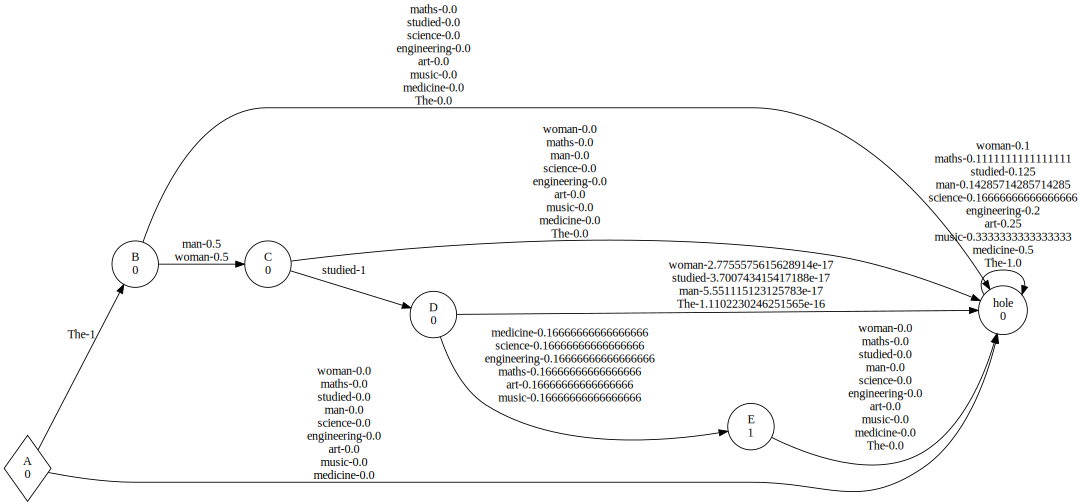

In [7]:
from pythautomata.model_exporters.dot_exporters.wfa_dot_exporting_strategy import WFADotExportingStrategy
from IPython.display import display

exporter = WFADotExportingStrategy()
graph = exporter.create_graph(property_model)

display(graph)

In [8]:
from utilities.syncronic_model_guided_language_model import SyncronicModelGuidedLanguageModel
syncrhronic_model = SyncronicModelGuidedLanguageModel(wrapper, property_model, model_name="GUIDED_GPT2", max_seq_length=10)

In [12]:
from pymodelextractor.teachers.pac_probabilistic_teacher import PACProbabilisticTeacher
from pymodelextractor.learners.observation_tree_learners.bounded_pdfa_quantization_n_ary_tree_learner import BoundedPDFAQuantizationNAryTreeLearner
from pythautomata.utilities.probability_partitioner import TopKProbabilityPartitioner, QuantizationProbabilityPartitioner, RankingPartitioner
from pythautomata.model_comparators.wfa_partition_comparison_strategy import WFAPartitionComparator
from pythautomata.utilities.uniform_word_sequence_generator import UniformWordSequenceGenerator
partitioner = QuantizationProbabilityPartitioner(100)
comparator = WFAPartitionComparator(partitioner)
epsilon = 0.1
delta = epsilon
sequence_generator = PDFASequenceGenerator(property_model, max_seq_length=10)
max_states = 10
max_query_length = 10


In [13]:
teacher  = PACProbabilisticTeacher(syncrhronic_model, epsilon = epsilon, delta = delta, max_seq_length = None, comparator = comparator, sequence_generator=sequence_generator, compute_epsilon_star=False)
learner = BoundedPDFAQuantizationNAryTreeLearner(partitioner, max_states, max_query_length, None, generate_partial_hipothesis = True, pre_cache_queries_for_building_hipothesis = True,  check_probabilistic_hipothesis = False)

In [14]:
learning_result = learner.learn(teacher, verbose=True)

KeyboardInterrupt: 

In [ ]:
from pythautomata.model_exporters.dot_exporters.wfa_dot_exporting_strategy import WFADotExportingStrategy
from IPython.display import display

exporter = WFADotExportingStrategy()
graph = exporter.create_graph(learning_result.model)

display(graph)